In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from pdpbox.pdp import pdp_isolate, pdp_plot

In [3]:
# imports the csv from my github as a dataframe

df0 = pd.read_csv('https://raw.githubusercontent.com/SeanAntosiak/LS-DS6-Unit-2-Project/master/LoLgames.csv')

In [4]:
# looks at dataframe

df0.head().T

,0,1,2,3,4
gameId,3326086514,3229566029,3327363504,3326856598,3330080762
creationTime,1504279457970,1497848803862,1504360103310,1504348503996,1504554410899
gameDuration,1949,1851,1493,1758,2094
seasonId,9,9,9,9,9
winner,1,1,1,1,1
firstBlood,2,1,2,1,2
firstTower,1,1,1,1,1
firstInhibitor,1,1,1,1,1
firstBaron,1,0,1,1,1
firstDragon,1,1,2,1,1


In [5]:
# looks at columns

df0.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [6]:
# checks shape of dataframe

df0.shape

(51490, 61)

In [7]:
# looking at the number of unique values in the first 5 columns

df0.nunique().head()

# gameId has less values than the shape of the dataframe so there must be duplicates which I will drop
# all games are season 9, so I will drop this column later
# creation time  is almost as unique as games, so I will also drop this column

gameId          51053
creationTime    51052
gameDuration     2590
seasonId            1
winner              2
dtype: int64

In [8]:
# checks the shape of the dataframe after droping duplicates

df0.drop_duplicates().shape

# since the rows of this DF matches the number of unique gameId values, I will use it as the new dataframe
# and then remove the game Id column since each game has its own unique id

(51053, 61)

In [9]:
# creates a copy of the dataframe and then drops rows/columns before mentioned columns

df = df0.copy()

df.drop_duplicates(inplace=True)
df.drop(columns=['gameId', 'creationTime', 'seasonId'], inplace=True)

In [10]:
# creates a dictionary to name teams then applies it to a few different columns
# then checks to make sure it worked

teamColor = {1: 'blue', 2: 'red', 0: 'neither'}
df.replace({'winner': teamColor, 
            'firstBlood': teamColor, 
            'firstTower': teamColor, 
            'firstInhibitor': teamColor, 
            'firstBaron': teamColor, 
            'firstDragon': teamColor, 
            'firstRiftHerald': teamColor}, inplace = True)
df.head()


,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,blue,red,blue,blue,blue,blue,red,8,12,...,5,0,0,1,1,114,67,43,16,51
1,1851,blue,blue,blue,blue,neither,blue,blue,119,7,...,2,0,0,0,0,11,67,238,51,420
2,1493,blue,red,blue,blue,blue,red,neither,18,4,...,2,0,0,1,0,157,238,121,57,28
3,1758,blue,blue,blue,blue,blue,blue,neither,57,4,...,0,0,0,0,0,164,18,141,40,51
4,2094,blue,red,blue,blue,blue,blue,neither,19,4,...,3,0,0,1,0,86,11,201,122,18


In [11]:
# checks for a majority class Baseline

df['winner'].value_counts(normalize=True)

# blue team apears to win slightly more games than red team
# baseline model is ~51% accuracy always guessing blue team will win for game at unkown rank

blue    0.506474
red     0.493526
Name: winner, dtype: float64

In [12]:
# creates a function that takes in a dataframe and a target as inputs
# the function will remove the target column and treat all other columns as features
# the function then performs a train test split, and then a train validation split and fits a random forest model
# next it scores it and returns the score, and importance values
# this function will be used to quikcly check accuracys by switching certain columns/features in the input dataframe

def SplitFitForest(df, targ):

    X0 = df.drop(columns=[targ])
    y0 = df[str(targ)]

    X0train, X0test, y0train, y0test = tts(X0,y0, train_size=0.90, test_size=0.10, random_state=8)

    X1train, X1val, y1train, y0val = tts(X0train,y0train, train_size=0.90, test_size=0.10, random_state=8)

    pipe = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1))
                     
    pipe.fit(X1train,y1train)
    
    score = pipe.score(X1val, y0val)    
    
    mod = pipe.named_steps['randomforestclassifier']
    importanceVals = mod.feature_importances_
    importanceCols = pipe.named_steps['onehotencoder'].fit_transform(X1train).columns
    importanceDF = pd.Series(importanceVals, importanceCols)
            
    return(score, importanceDF);

In [13]:
# runs the function and saves results in new variables

dftry = df[['winner', 'firstBlood', 'firstTower']]

score0, importanceDF0 = SplitFitForest(dftry, 'winner')

In [14]:
# checks if function worked 

print('accuracy score:', score0)
print('')
print('importance values:')
importanceDF0.head()

accuracy score: 0.7088139281828074

importance values:


firstBlood_red        0.056268
firstBlood_neither    0.001945
firstBlood_blue       0.047016
firstTower_red        0.475440
firstTower_blue       0.411520
dtype: float64

In [15]:
# takes the steps out of the function used previously
# and creates a new DF to use for PDP
    
X0 = df[['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']]
y0 = df[['winner']]

X0train, X0test, y0train, y0test = tts(X0,y0, train_size=0.90, test_size=0.10, random_state=8)

X1train, X1val, y1train, y0val = tts(X0train,y0train, train_size=0.90, test_size=0.10, random_state=8)

pipe = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1))                   
pipe.fit(X1train,y1train)
    
score = pipe.score(X1val, y0val)    
    
mod = pipe.named_steps['randomforestclassifier']
importanceVals = mod.feature_importances_
importanceCols = pipe.named_steps['onehotencoder'].fit_transform(X1train).columns
importanceDF = pd.Series(importanceVals, importanceCols)

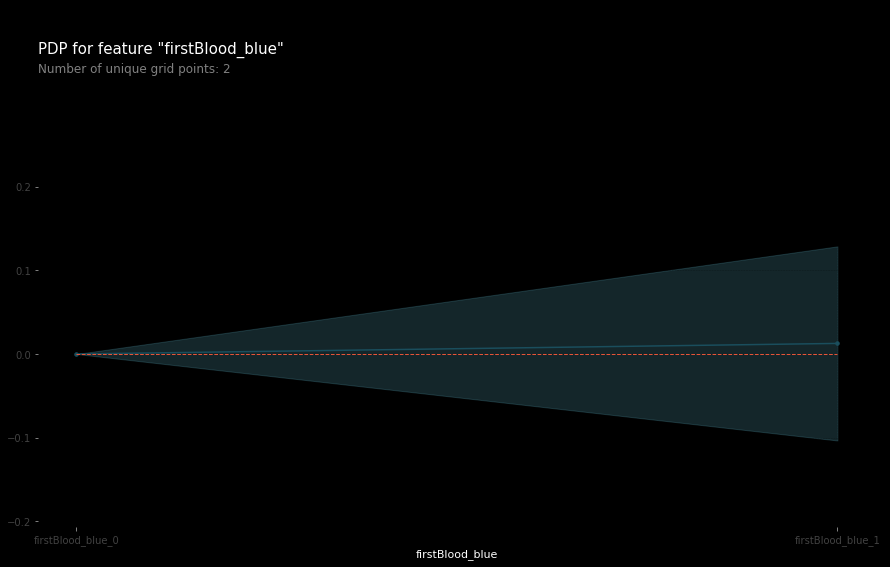

In [16]:
# creates a pdp plotfor when blue team gets the first kill

isolated = pdp_isolate(model=mod,
                       dataset=pipe.named_steps['onehotencoder'].fit_transform(X1val),
                       model_features=pipe.named_steps['onehotencoder'].fit_transform(X1val).columns,
                       feature='firstBlood_blue')

plt.style.use('dark_background')
pdp_plot(isolated, feature_name='firstBlood_blue');

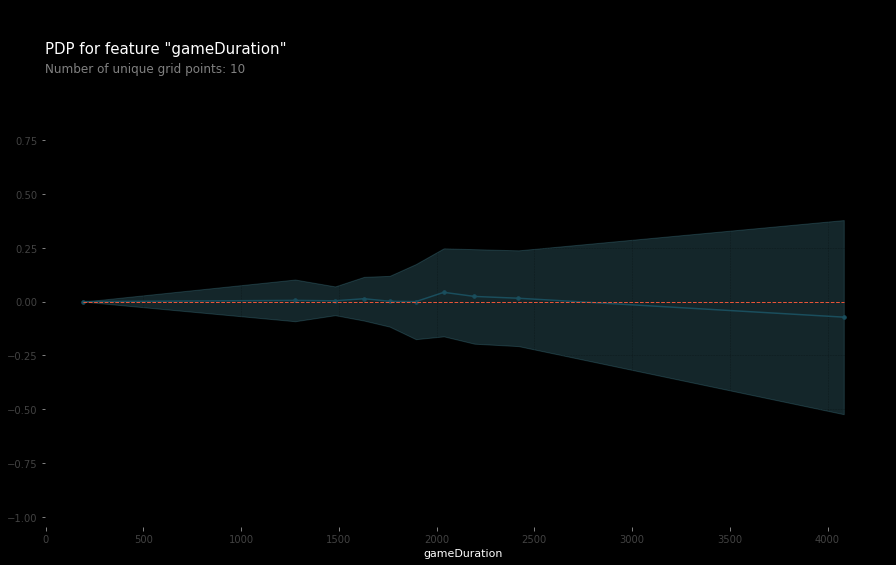

In [17]:
# creates a pdp plot for game time

isolated = pdp_isolate(model=mod,
                       dataset=pipe.named_steps['onehotencoder'].fit_transform(X1val),
                       model_features=pipe.named_steps['onehotencoder'].fit_transform(X1val).columns,
                       feature='gameDuration')

plt.style.use('dark_background')
pdp_plot(isolated, feature_name='gameDuration');

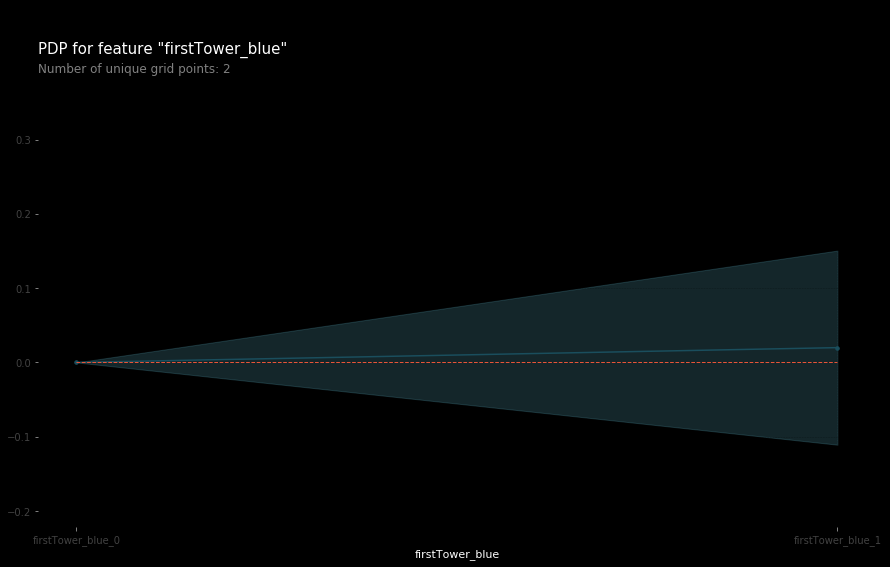

In [18]:
# creates a pdp plotfor when blue team gets the first tower

isolated = pdp_isolate(model=mod,
                       dataset=pipe.named_steps['onehotencoder'].fit_transform(X1val),
                       model_features=pipe.named_steps['onehotencoder'].fit_transform(X1val).columns,
                       feature='firstTower_blue')

plt.style.use('dark_background')
pdp_plot(isolated, feature_name='firstTower_blue');